In [25]:
import pandas as pd
import numpy as np

In [26]:
df = pd.read_csv(r'D:/data_science/Research/16.csv')

In [27]:
df.drop(['type','pos_noise/0','pos_noise/1','pos_noise/2','spd_noise/2','spd_noise/1','spd_noise/0','spd/2'],axis = 1, inplace = True)

In [28]:
x = df[['time','sender','messageID','pos/0','pos/1','pos/2','spd/0','spd/1']]
y = df.iloc[:,2:3].values

In [29]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state = 0)
x, y = smk.fit_sample(x,y)

In [30]:
#Spliting dataset into Train and Test set 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [31]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [32]:
from sklearn.ensemble import RandomForestClassifier
reg = RandomForestClassifier(random_state = 0)
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)

In [33]:
#checking Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.56%


[[3554  121]
 [ 210 3568]]


C:\Users\Jayesh\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0.5, 1, 'Random Forest')

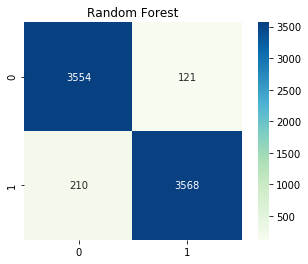

In [34]:
#confusion matrix
from sklearn.metrics import confusion_matrix
con = confusion_matrix(y_test,y_pred)
print(con)
import seaborn as sns
import matplotlib.pyplot as plt
axes = sns.heatmap(con, square=True,annot=True,fmt='d',cbar = True, cmap = plt.cm.GnBu)
ax = plt.axes()
ax.set_title('Random Forest')

In [35]:
from sklearn.metrics import classification_report
print('Decision Tree')
print(classification_report(y_test, y_pred))


Decision Tree
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      3675
          16       0.97      0.94      0.96      3778

    accuracy                           0.96      7453
   macro avg       0.96      0.96      0.96      7453
weighted avg       0.96      0.96      0.96      7453



[0.22 0.12 0.85 ... 0.87 0.35 0.02]
Logistic : ROC AUC = 0.993


C:\Users\Jayesh\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


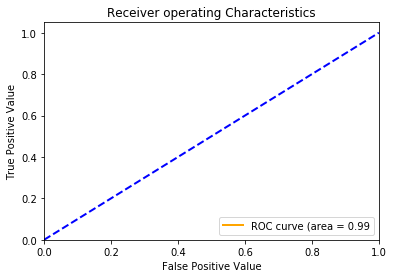

In [36]:
#ROC and AUC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
clf_probs = reg.predict_proba(x_test)
clf_probs = clf_probs[:,1]
print(clf_probs)
ras = roc_auc_score(y_test,clf_probs)
print("Logistic : ROC AUC = %.3f" %(ras))
from sklearn.preprocessing import label_binarize
y = label_binarize(y_test,classes = [0,4])
n_classes = y.shape[1]
fpr,tpr,_ = roc_curve(y,clf_probs)
plt.figure()
lw = 2
plt.plot(fpr,tpr, color = "orange", lw = lw, label = "ROC curve (area = %0.2f" % ras)
plt.plot([0,1],[0,1], color = "blue",lw = lw, linestyle = '--')
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.05)
plt.xlabel('False Positive Value')
plt.ylabel('True Positive Value')
plt.title('Receiver operating Characteristics')
plt.legend(loc = "lower right")
plt.show()